In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('/content/online_retail.csv')

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [10]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
df['Revenue']=df['Quantity'] = df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,12/1/2010 8:26,2.55,17850.0,United Kingdom,2.55
1,536365,71053,WHITE METAL LANTERN,3.39,12/1/2010 8:26,3.39,17850.0,United Kingdom,3.39
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2.75,12/1/2010 8:26,2.75,17850.0,United Kingdom,2.75
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,12/1/2010 8:26,3.39,17850.0,United Kingdom,3.39
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39,12/1/2010 8:26,3.39,17850.0,United Kingdom,3.39


In [14]:
country_sales = df.groupby("Country")["Revenue"].sum().sort_values(ascending=False)
print(country_sales)

Country
United Kingdom          2245715.474
EIRE                      48447.190
France                    43031.990
Germany                   37666.000
Singapore                 25108.890
Portugal                  13037.540
Spain                     12633.450
Hong Kong                 12241.500
Belgium                    7540.130
Switzerland                6813.690
Norway                     6529.060
Netherlands                6492.550
Australia                  4054.750
Cyprus                     3920.070
Italy                      3879.390
Finland                    3786.850
Channel Islands            3738.550
Sweden                     1806.830
Austria                    1701.520
Poland                     1422.270
Denmark                    1266.950
Unspecified                1204.010
Israel                     1079.040
Canada                      910.580
Japan                       814.860
Greece                      713.290
Malta                       666.010
USA                 

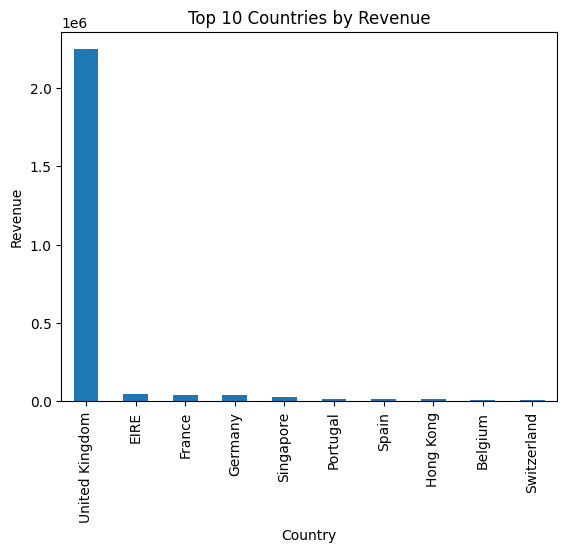

In [15]:
country_sales.head(10).plot(kind="bar")
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.show()

In [18]:
top_products = df.groupby("Description")["Revenue"].sum().sort_values(ascending=False)
print(top_products)

Description
AMAZON FEE                  249042.68
Manual                      214450.96
DOTCOM POSTAGE              206252.06
POSTAGE                      46388.47
REGENCY CAKESTAND 3 TIER     30360.61
                              ...    
dotcomstock                      0.00
for online retail orders         0.00
faulty                           0.00
found                            0.00
Adjust bad debt             -11062.06
Name: Revenue, Length: 4223, dtype: float64


In [23]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"],errors='coerce')
print(df["InvoiceDate"].dtype)



datetime64[ns]


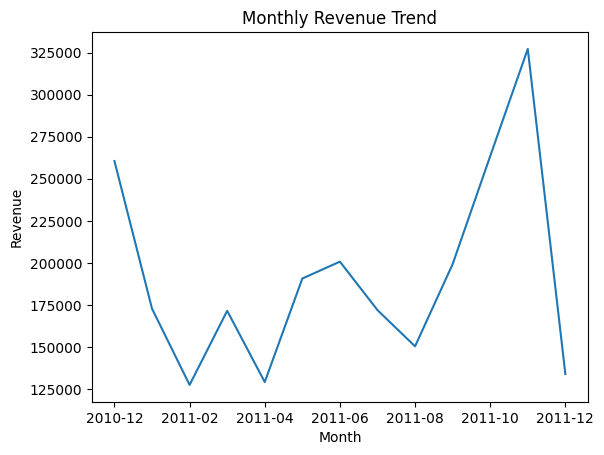

In [25]:
df["YearMonth"] = df["InvoiceDate"].dt.strftime("%Y-%m")

monthly_sales = df.groupby("YearMonth")["Revenue"].sum()
monthly_sales.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

In [ ]:
#Recommendations-
#1)The company should focus more on high-performing countries like the UK to maximize profits
#2)Marketing efforts should promote top-selling products increase revenue further
#3)Low-Perfroming countries may require targeted campaigns toimprove tasks
#4) Seasonal trends suggest increasing inventory before peak months


In [26]:
print(df.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity              float64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Revenue               float64
YearMonth              object
dtype: object
